# Support Vector Machine

By Rama Vempati

To connect with or follow me on LinkedIn [Click Here](https://www.linkedin.com/in/ramavempati/)


SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

At first approximation what SVMs do is to find a separating line (or hyperplane) between data of classes. SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible.

### Let us undestand this a little better

Support Vector Machine (SVM), which can be considered an extension of the perceptron. Using the perceptron algorithm, we typically minimize misclassification errors. However, in SVMs our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training
samples that are closest to this hyperplane, which are the so-called support vectors.

This is illustrated in the following figure:

<img src='images/svm_01.png' alt='svm1'/>

#### SVM with a linear kernel

Now let's train a linear Support Vector Classifier. a SVM classifier finds the hyper-plane that maximizes the margin between the 2 groups if they are linearly separable. If the data is not linearly separable, there is a trade-off between the margin size and the number of points that are on the wrong side of the decision boundary. this is determined by the regularization coefficient.

#### Tuning Parameters

Parameters are arguments that you pass when you create your classifier. Following are the important parameters for SVM.

#### C

It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of C means you will get more training points correctly.

Via the variable C, we can then control the penalty for misclassification. Large values of C correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for C. We can then use the C parameter to control the width of the margin and therefore tune the bias-variance trade-off, as illustrated in the following figure:

<img src='images/svm_02.png' alt='svm2'/>

### Example 1: Linear Kernel

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Let us split the data into Training and Testing in 70:30 proportion

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Let us standardize the features

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=123)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

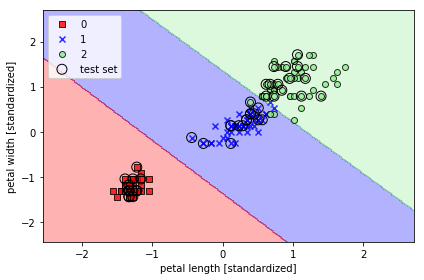

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Example 2 - Non-Linear Kernel

Another reason why SVMs enjoy high popularity among machine learning practitioners is that it can be easily kernelized to solve nonlinear classification problems.

Using the following code, we will create a simple dataset that has the form of an XOR gate using the logical_or function from NumPy, where 100 samples will be assigned the class label 1, and 100 samples will be assigned the class label -1

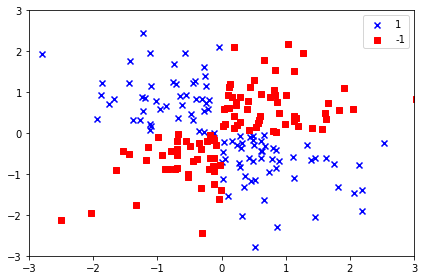

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Obviously, we would not be able to separate samples from the positive and negative class very well using a linear hyperplane as a decision boundary via the linear logistic regression or linear SVM model that we discussed in earlier sections.

The basic idea behind kernel methods to deal with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function $\pmb \Phi$  where it becomes linearly separable.

<img src='images/svm_03.png' alt='svm3'/>

To solve a nonlinear problem using an SVM, we would transform the training data onto a higher-dimensional feature space via a mapping function and train a linear SVM model to classify the data in this new feature space. Then, we can use the same mapping function to transform new, unseen data to classify it using the linear SVM model.

However, one problem with this mapping approach is that the construction of the new features is computationally very expensive, especially if we are dealing with high-dimensional data. This is where the so-called kernel trick comes into play.

One of the most widely used kernels is the Radial Basis Function (RBF) kernel or simply called the Gaussian kernel.

There are other kernels too known as Polynomial Kernel and Sigmoid Kernel.

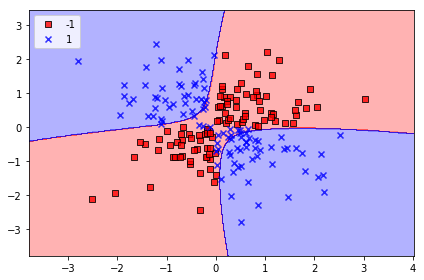

In [9]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The $\pmb \gamma$ parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. 

If gamma has a very high value, then the decision boundary is just going to be dependent upon the points that are very close to the line which effectively results in ignoring some of the points that are very far from the decision boundary. This is because the closer points get more weight and it results in a wiggly curve. On the other hand, if the gamma value is low even the far away points get considerable weight and we get a more linear curve.

If we increase the value for $\pmb \gamma$, we increase the influence or reach of the training samples, which leads to a tighter and bumpier decision boundary. To get a better intuition for $\pmb \gamma$, let us apply an RBF kernel SVM to
our Iris flower dataset:

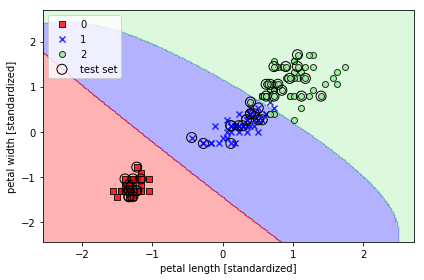

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Now, let us increase the value of $\pmb \gamma$ and observe the effect on the decision boundary:

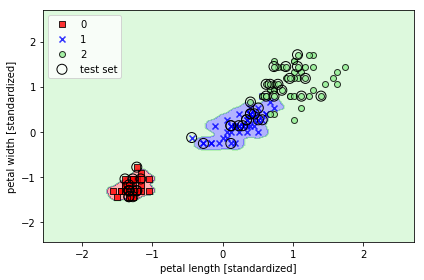

In [11]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Grid Search

To show the power of kernel SVMs, we're going to solve a problem of purely non-linear data and the dataset is generated through the make_circles() built-in function

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [19]:
# For reproducibility
np.random.seed(1000)

nb_samples = 500


def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

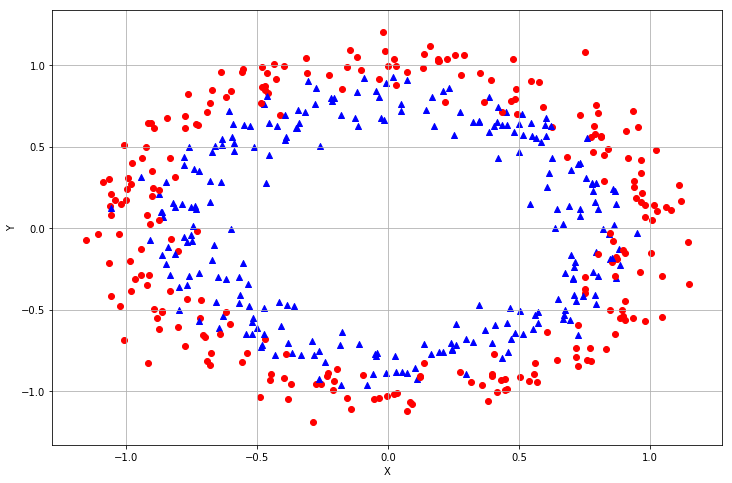

In [20]:
# Create datasets
X, Y = make_circles(n_samples=nb_samples, noise=0.1)

# Show dataset
show_dataset(X, Y)

In [16]:
# Define a param grid
param_grid = [
    {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma' : [0.1, 0.001, 0.0001],
        'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]
    }
]

# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                      scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(X, Y)

print(gs.best_estimator_)
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Kernel SVM score: 0.860


#### Conclusion:

As expected from the geometry of our dataset, the best kernel is an RBF, which yields 87% accuracy. Further refinements on gamma could slightly increase this value, but as there is a partial overlap between the two subsets, it's very difficult to achieve an accuracy close to 100%. However, our goal is not to overfit our model; it is to guarantee an appropriate level of generalization. So, considering the shape, a limited number of misclassifications is acceptable, to ensure that the model captures sub-oscillations in the boundary surface.

### Example 3 - Breast Cancer Detection using SVM

We will do classification using both KNN and SVM on Breast Cancer Dataset

In [21]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [23]:
# Preprocess the data
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [24]:
# Describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


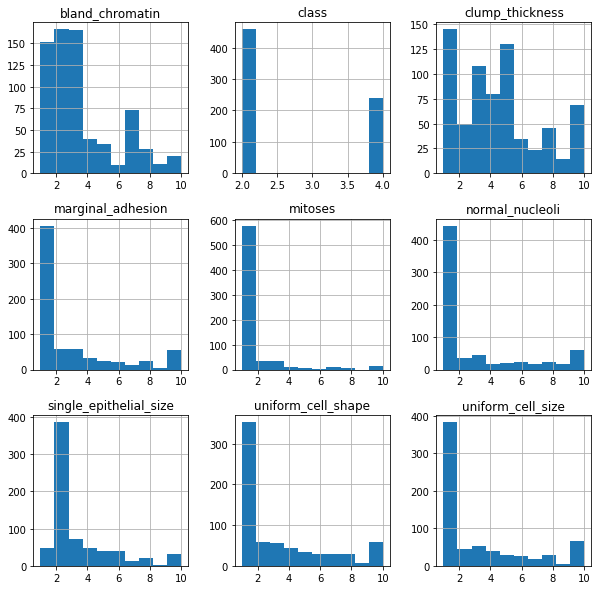

In [25]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

In [26]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Testing Options
seed = 123
scoring = 'accuracy'

In [28]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.967760 (0.020927)
SVM: 0.951688 (0.022683)


#### Advantages of SVM
The following are the advantages that the SVM algorithm provides to us:
* It performs well for complicated datasets
* It can be used for a multiclass classifier

#### Disadvantages of SVM
The following are the disadvantages of the SVM algorithm:

* It will not perform well when you have a very large dataset because it takes a lot of training time
* It will not work effectively when the data is too noisy